# Code Exercises

In [12]:
import numpy as np 
import matplotlib.pyplot as plt

Exercise 9-1.
A square Q has the following equalities:
$$ Q^TQ = QQ^T = Q^{-1}Q = QQ^{-1} = I $$
Demonstrate this in code by computing Q from a random-numbers matrix, then
compute $Q ^T $
 and $Q^{−1} $. Then show that all four expressions produce the identity matrix

In [13]:
A = np.random.randn(6, 6)

Q, R = np.linalg.qr(A)
Qinv = np.linalg.inv(Q)

QtQ = Q.T @ Q 
QQt = Q @ Q.T 
QinvQ = Qinv @ Q 
QQinv = Q @ Qinv 
print(f'QtQ = {QtQ}')
print(f'QQt = {QQt}')
print(f'QinvQ = {QinvQ}')
print(f'QQinv = {QQinv}')

QtQ = [[ 1.00000000e+00  1.29741117e-17  8.47955907e-18 -2.62331543e-18
   2.12807249e-17  4.14790262e-18]
 [ 1.29741117e-17  1.00000000e+00 -3.58854252e-17  5.47202371e-17
   3.99474962e-17 -2.78996345e-17]
 [ 8.47955907e-18 -3.58854252e-17  1.00000000e+00  1.41700432e-16
  -4.62181793e-17 -2.56925053e-17]
 [-2.62331543e-18  5.47202371e-17  1.41700432e-16  1.00000000e+00
  -1.76365937e-16  1.22803840e-16]
 [ 2.12807249e-17  3.99474962e-17 -4.62181793e-17 -1.76365937e-16
   1.00000000e+00  1.42966444e-16]
 [ 4.14790262e-18 -2.78996345e-17 -2.56925053e-17  1.22803840e-16
   1.42966444e-16  1.00000000e+00]]
QQt = [[ 1.00000000e+00 -4.22153282e-17  5.78433500e-17 -6.23845488e-17
   9.07741521e-17  1.45121038e-17]
 [-4.22153282e-17  1.00000000e+00 -1.46920775e-20 -2.58981102e-16
  -1.95988889e-17  4.23027455e-17]
 [ 5.78433500e-17 -1.46920775e-20  1.00000000e+00  7.60520234e-17
  -7.37393762e-17  3.36563737e-17]
 [-6.23845488e-17 -2.58981102e-16  7.60520234e-17  1.00000000e+00
   9.0729609

Exercise 9-2.
Implement the Gram-Schmidt procedure as described earlier.4
 Use a 4 × 4 randomnumbers matrix. Check your answer against Q from np.linalg.qr.
Important: there is a fundamental sign uncertainty in transformations like the
Householder reflection. This means that vectors can “flip” (be multiplied by −1)
depending on minor differences in algorithm and implementation. This feature exists
in many matrix decompositions including eigenvectors. I have a longer and more
in-depth discussion of why this is and what it means in Chapter 13. For now, the
upshot is this: subtract your Q from Python’s Q and add your Q and Python’s Q.
Nonzero columns in one will be zeros in the other.

In [14]:
def GS_process(A : np.array) : 
    Q = np.zeros(A.shape)

    for i in range(A.shape[1]) : 
        Q[:, i] = A[:, i]
        a = A[:, i]
        for j in range(i) : 
            p = Q[:, j]
            Q[:, i] = Q[:, i] - np.dot(a, p) / np.dot(p, p) * p
        
        Q[:, i] /= np.linalg.norm(Q[:, i])

    return Q


In [15]:
A = np.random.randn(4, 4)

Q_1 = GS_process(A)

Q_2, r = np.linalg.qr(A)

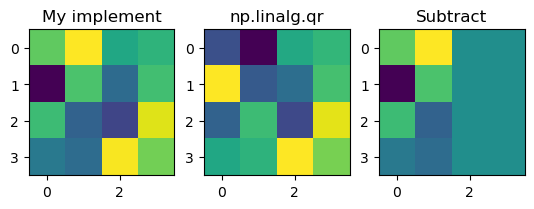

In [19]:
fig, ax = plt.subplots(ncols = 3)

ax[0].imshow(Q_1)
ax[0].set_title('My implement')

ax[1].imshow(Q_2) 
ax[1].set_title('np.linalg.qr')

ax[2].imshow(Q_1 - Q_2)
ax[2].set_title('Subtract')

plt.show()

Exercise 9-3.
In this exercise, you will find out what happens when you apply QR decomposition
to a matrix that is almost-but-not-quite orthogonal. First, create an orthogonal matrix,
called U, from the QR decomposition of a 6 × 6 random-numbers matrix. Compute
the QR decomposition of U, and confirm that R = I (and make sure you understand
why!).
Second, modify the norms of each column of U. Set the norms of columns 1–6 to be
10–15 (that is, the first column of U should have a norm of 10, the second column
Code Exercises | 155
should have a norm of 11, and so on). Run that modulated U matrix through QR
decomposition and confirm that its R is a diagonal matrix with diagonal elements
equaling 10–15. What is Q
TQ for this matrix?
Third, break the orthogonality of U by setting element u1, 4 = 0. What happens to R
and why?


In [ ]:
U = np.random.randn(6, 6)

